### Overview

To assess the impact of climate change on Earth's flora and fauna, it is vital to quantify how human activities such as logging, mining, and agriculture are impacting our protected natural areas. Researchers in Mexico have created the VIGIA project, which aims to build a system for autonomous surveillance of protected areas. A first step in such an effort is the ability to recognize the vegetation inside the protected areas. In this competition, you are tasked with creation of an algorithm that can identify a specific type of cactus in aerial imagery.

<p align="center">
    <img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Flistovative.com%2Fwp-content%2Fuploads%2F2014%2F07%2F87.jpg&f=1" width="500" height="auto">
</p>

#### Author - [Amitrajit Bose](https://amitrajitbose.github.io)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch

In [2]:
data_folder = Path("../input")
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/sample_submission.csv")

### Image Loading & Transforms

In [3]:
test_img = ImageList.from_df(test_df, path=data_folder/'test', folder='test')
trfm = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)
train_img = (ImageList.from_df(train_df, path=data_folder/'train', folder='train')
        .split_by_rand_pct(0.01)
        .label_from_df()
        .add_test(test_img)
        .transform(trfm, size=128)
        .databunch(path='.', bs=64, device= torch.device('cuda:0'))
        .normalize(imagenet_stats)
       )

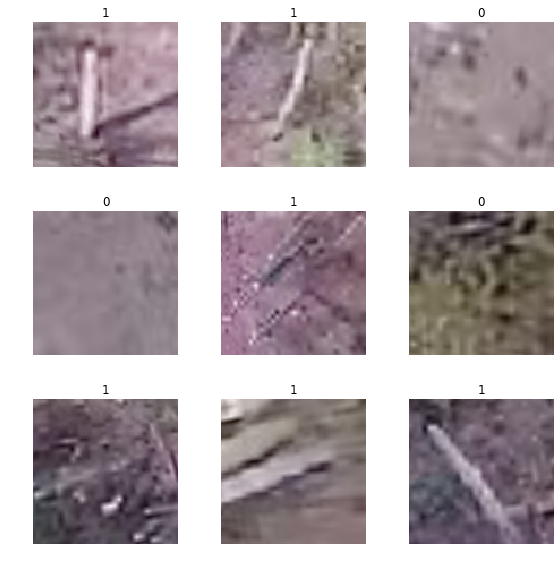

In [4]:
train_img.show_batch(rows=3, figsize=(8,8))

In [5]:
learn = cnn_learner(train_img, models.densenet169, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /tmp/.torch/models/densenet169-b2777c0a.pth
57365526it [00:00, 73913857.80it/s]


In [6]:
#learn.lr_find()
#learn.recorder.plot()

In [7]:
lr = 3e-02
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.060301,0.019322,0.005714,0.994286,01:11
1,0.051717,0.000014,0.000000,1.000000,01:06
2,0.028369,0.034960,0.011429,0.988571,01:05
3,0.009347,0.000258,0.000000,1.000000,01:04
4,0.007001,0.000039,0.000000,1.000000,01:04


In [8]:
#learn.unfreeze()
#learn.lr_find()
#learn.recorder.plot()

In [9]:
#learn.fit_one_cycle(1, slice(1e-06))

In [10]:
#interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_top_losses(9, figsize=(7,6))

In [11]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test)

In [12]:
test_df.has_cactus = preds.numpy()[:, 0]

In [13]:
test_df.to_csv('submission.csv', index=False)